# FFT

Imagen cargada correctamente.


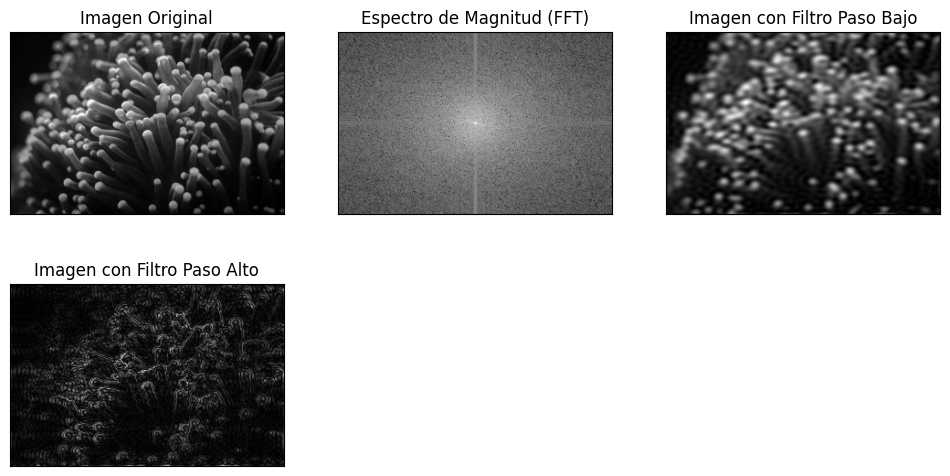

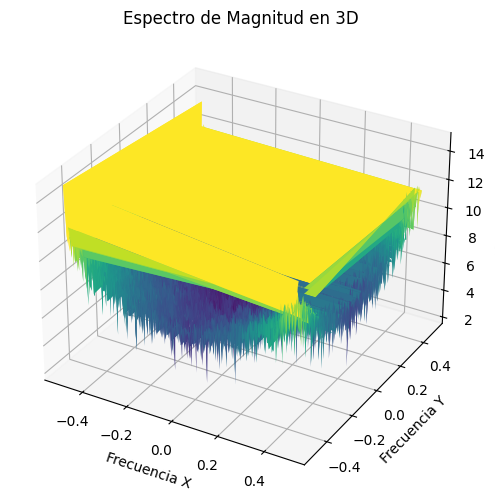

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar imagen en escala de grises
image = cv2.imread('CORAL.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: La imagen no se pudo cargar.")
else:
    print("Imagen cargada correctamente.")

# Transformación de Fourier (FFT)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # Desplazar el cero de frecuencia al centro

# Magnitud de la frecuencia
magnitude_spectrum = np.abs(fshift)

# Crear un filtro de paso bajo
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Centro de la imagen

# Paso bajo: Eliminar frecuencias altas (más allá de un radio)
radius = 30  # Radio del filtro
low_pass_filter = np.zeros((rows, cols))
center_x, center_y = crow, ccol
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - center_x)**2 + (j - center_y)**2) <= radius:
            low_pass_filter[i, j] = 1

# Aplicar filtro de paso bajo
fshift_low = fshift * low_pass_filter
image_low = np.fft.ifft2(np.fft.ifftshift(fshift_low))
image_low = np.abs(image_low)

# Crear un filtro de paso alto
high_pass_filter = np.ones((rows, cols))
high_pass_filter[center_x - radius:center_x + radius, center_y - radius:center_y + radius] = 0

# Aplicar filtro de paso alto
fshift_high = fshift * high_pass_filter
image_high = np.fft.ifft2(np.fft.ifftshift(fshift_high))
image_high = np.abs(image_high)

# Visualización de las imágenes en 2D y 3D

# Figura para las imágenes 2D
plt.figure(figsize=(12, 6))

# Visualizar la imagen original
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.xticks([]), plt.yticks([])

# Visualizar el espectro de magnitud de la imagen original en el dominio de la frecuencia
plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Espectro de Magnitud (FFT)')
plt.xticks([]), plt.yticks([])

# Visualizar la imagen después del filtro de paso bajo
plt.subplot(2, 3, 3)
plt.imshow(image_low, cmap='gray')
plt.title('Imagen con Filtro Paso Bajo')
plt.xticks([]), plt.yticks([])

# Visualizar la imagen después del filtro de paso alto
plt.subplot(2, 3, 4)
plt.imshow(image_high, cmap='gray')
plt.title('Imagen con Filtro Paso Alto')
plt.xticks([]), plt.yticks([])

# Visualización en 3D de la magnitud del espectro de Fourier
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
X = np.fft.fftfreq(cols)
Y = np.fft.fftfreq(rows)
X, Y = np.meshgrid(X, Y)
Z = np.log(1 + magnitude_spectrum)

# Mapa 3D de la magnitud
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Espectro de Magnitud en 3D')
ax.set_xlabel('Frecuencia X')
ax.set_ylabel('Frecuencia Y')
ax.set_zlabel('Magnitud')

plt.show()


# DFT

Imagen cargada correctamente.


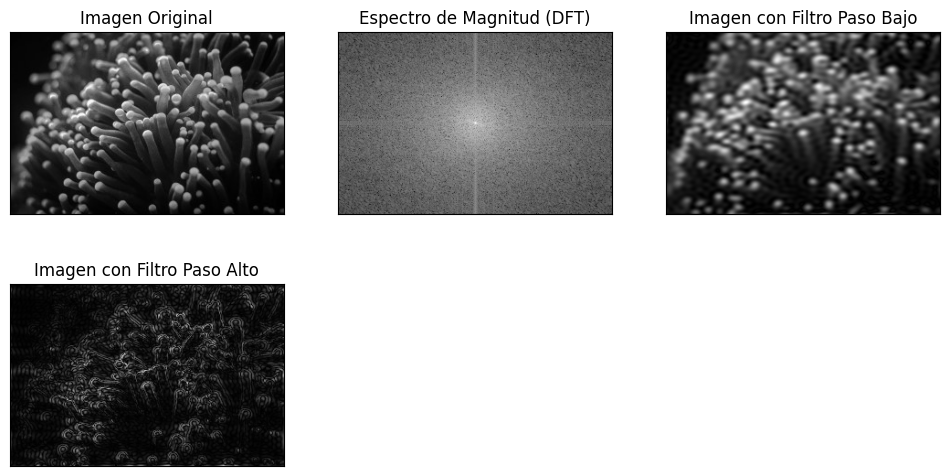

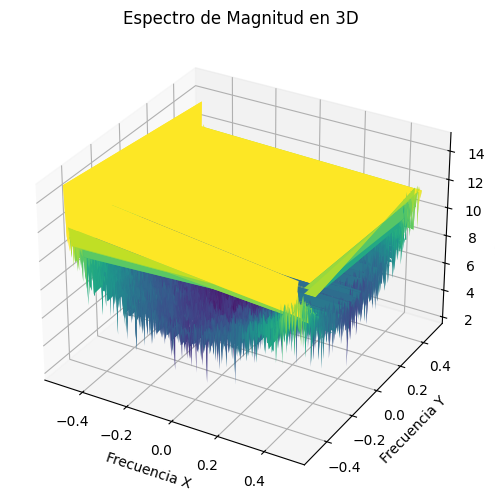

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar imagen en escala de grises
image = cv2.imread('CORAL.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: La imagen no se pudo cargar.")
else:
    print("Imagen cargada correctamente.")

# Aplicación de la DFT utilizando OpenCV
# Primero, convertimos la imagen en flotante y normalizamos
image_float = np.float32(image)
dft = cv2.dft(image_float, flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Desplazar el centro de la frecuencia

# Magnitud de la frecuencia
magnitude_spectrum = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

# Crear un filtro de paso bajo
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Centro de la imagen

# Paso bajo: Eliminar frecuencias altas (más allá de un radio)
radius = 30  # Radio del filtro
low_pass_filter = np.zeros((rows, cols), np.float32)
center_x, center_y = crow, ccol
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - center_x)**2 + (j - center_y)**2) <= radius:
            low_pass_filter[i, j] = 1

# Aplicar filtro de paso bajo
dft_shift_low = dft_shift * low_pass_filter[:, :, np.newaxis]
image_low = cv2.idft(np.fft.ifftshift(dft_shift_low))
image_low = cv2.magnitude(image_low[:, :, 0], image_low[:, :, 1])

# Crear un filtro de paso alto
high_pass_filter = np.ones((rows, cols), np.float32)
high_pass_filter[center_x - radius:center_x + radius, center_y - radius:center_y + radius] = 0

# Aplicar filtro de paso alto
dft_shift_high = dft_shift * high_pass_filter[:, :, np.newaxis]
image_high = cv2.idft(np.fft.ifftshift(dft_shift_high))
image_high = cv2.magnitude(image_high[:, :, 0], image_high[:, :, 1])

# Visualización de las imágenes en 2D y 3D

# Figura para las imágenes 2D
plt.figure(figsize=(12, 6))

# Visualizar la imagen original
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.xticks([]), plt.yticks([])

# Visualizar el espectro de magnitud de la imagen original en el dominio de la frecuencia
plt.subplot(2, 3, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Espectro de Magnitud (DFT)')
plt.xticks([]), plt.yticks([])

# Visualizar la imagen después del filtro de paso bajo
plt.subplot(2, 3, 3)
plt.imshow(image_low, cmap='gray')
plt.title('Imagen con Filtro Paso Bajo')
plt.xticks([]), plt.yticks([])

# Visualizar la imagen después del filtro de paso alto
plt.subplot(2, 3, 4)
plt.imshow(image_high, cmap='gray')
plt.title('Imagen con Filtro Paso Alto')
plt.xticks([]), plt.yticks([])

# Visualización en 3D de la magnitud del espectro de Fourier
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
X = np.fft.fftfreq(cols)
Y = np.fft.fftfreq(rows)
X, Y = np.meshgrid(X, Y)
Z = np.log(1 + magnitude_spectrum)

# Mapa 3D de la magnitud
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Espectro de Magnitud en 3D')
ax.set_xlabel('Frecuencia X')
ax.set_ylabel('Frecuencia Y')
ax.set_zlabel('Magnitud')

plt.show()
